In [1]:
import os,sys
sys.path.insert(1, '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/scikit/')
from tools import read_and_proc
import numpy as np
from tqdm.auto import tqdm
from sklearn.decomposition import IncrementalPCA
sys.path.insert(1, '../')
import read_stuff as read
import gc
#from advanced_pca import CustomPCA

In [2]:
def train_valid_test(expvarlist=None,validindex=None,testindex=None,concat='Yes'):
    X_valid, X_test = [expvarlist[i] for i in validindex], [expvarlist[i] for i in testindex]
    X_traint = expvarlist.copy()
    popindex = validindex+testindex
    X_train = [X_traint[i] for i in range(len(X_traint)) if i not in popindex]
    #assert len(X_train)==16, 'wrong train-valid-test separation!'
    if concat=='Yes':
        return np.concatenate([X_train[i] for i in range(len(X_train))],axis=0), np.concatenate([X_valid[i] for i in range(len(X_valid))],axis=0), np.concatenate([X_test[i] for i in range(len(X_test))],axis=0)
    else:
        return X_train, X_valid, X_test
    
class producePCA:
    def __init__(self,PCATYPE='varimax',n_comps=60):
        self.PCATYPE=PCATYPE
        self.n_comps=n_comps
    
    def fit_cheap_pca(self,n_batches=None,n_comps=None,var=None):
        from sklearn.decomposition import IncrementalPCA
        inc_pca = IncrementalPCA(n_components=n_comps)
        for X_batch in (np.array_split(var.data,n_batches)):
            inc_pca.partial_fit(X_batch)
        return inc_pca
        
    def fitPCA(self,arrays=None,arrayname=None,n_batches=10):
        """
        arrays: flat arrays to perform PCs
        arrayname: name of the variables
        axi: 2D or 3D
        """
        PCAdict = {}
        for ind,vnme in tqdm(enumerate(arrayname)):
            if self.PCATYPE=='varimax':
                try:
                    todo = arrays[ind]#-np.mean(arrays[ind])
                    PCAdict[vnme] = CustomPCA(n_components=self.n_comps,rotation='varimax').fit(todo)
                except:
                    sys.exit("Did not install R!")
            elif self.PCATYPE=='orig':
                PCAdict[vnme] = self.fit_cheap_pca(n_batches=n_batches,n_comps=self.n_comps,var=arrays[ind])
        return PCAdict
    
def long_MariaExps(array=None,start=None):
    haiyan_temparray = [(array[0][12:,:])[15:,:],array[1][int(start[0]):,:],array[2][int(start[1]):,:],array[3][int(start[2]):,:],array[4][int(start[3]):,:]]
    #haiyan_temparray = [(array[0][12:,:]),array[1][int(start[0]):,:],array[2][int(start[1]):,:],array[3][int(start[2]):,:],array[4][int(start[3]):,:]]
    del array
    gc.collect()
    return haiyan_temparray#np.concatenate(haiyan_temparray,axis=0)

def find_start(haiyan_data=None,ref1=0,testexp=1):
    for i in range(len(haiyan_data[ref1])):
        if str((haiyan_data[ref1][i]==haiyan_data[testexp][i]).all())=='True':
            continue
        else:
            break
    return i

In [3]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'

maria_u = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['u'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_v = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['v'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_w = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['w'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_qv = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['qv'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_theta = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['theta'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_heatsum = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['heatsum'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_hdia = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['hdia'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_rad = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix)['rad'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_lw = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix+'_radcomp')['LW'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]
maria_sw = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc2/'+str(lime)+suffix+'_radcomp')['SW'] for lime in tqdm(['ctl','ncrf_36h','ncrf_60h','ncrf_96h','lwcrf'])]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
start = [find_start(maria_lw,0,1),find_start(maria_lw,0,2),find_start(maria_lw,0,3),find_start(maria_lw,0,4)]
maria_ua,maria_va,maria_wa = long_MariaExps(maria_u,start),long_MariaExps(maria_v,start),long_MariaExps(maria_w,start)
maria_qva,maria_thetaa,maria_heatsuma = long_MariaExps(maria_qv,start),long_MariaExps(maria_theta,start),long_MariaExps(maria_heatsum,start)
maria_hdiaa,maria_swa,maria_lwa,maria_rada = long_MariaExps(maria_hdia,start),long_MariaExps(maria_sw,start),long_MariaExps(maria_lw,start),long_MariaExps(maria_rad,start)

In [5]:
import gc
varnames = ['u','v','w','theta','qv','hdia','rad','lw','sw']
var = [maria_ua,maria_va,maria_wa,maria_thetaa,maria_qva,maria_hdiaa,maria_rada,maria_lwa,maria_swa]
del maria_u,maria_v,maria_w,maria_theta,maria_qv,maria_hdia,maria_rad,maria_lw,maria_sw,maria_ua,maria_va,maria_wa,maria_thetaa,maria_qva,maria_hdiaa,maria_rada,maria_lwa,maria_swa
gc.collect()

storedict = []
for ind,varname in tqdm(enumerate(varnames)):
    store = []
    for j,sd in tqdm(enumerate([2,3,4])):
        X_train,_,_ = (train_valid_test(var[ind],[sd],[1],'Yes'))
        PCAdict3D = producePCA('orig',60).fitPCA([X_train],[varname],3)
        read_and_proc.save_to_pickle('./maria_store/pca/'+str(varname)+'/'+str(j)+'/'+'PCA3D_corr.pkg',PCAdict3D,'PICKLE')
        del X_train,PCAdict3D
        gc.collect()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [9]:
TEST = storedict[0][0]['lw'].components_[0,...].reshape(39,360,200)

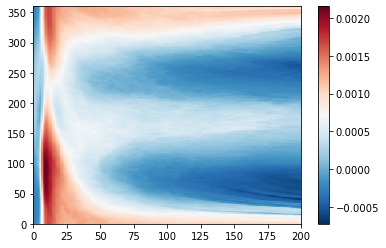

In [11]:
import matplotlib.pyplot as plt
plt.pcolormesh(TEST[1,...],cmap='RdBu_r')
plt.colorbar()
plt.show()

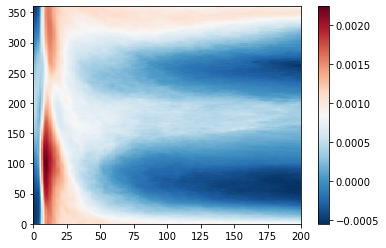

In [10]:
import matplotlib.pyplot as plt
plt.pcolormesh(TEST[1,...],cmap='RdBu_r')
plt.colorbar()
plt.show()

# Haiyan

In [2]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
a = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'].shape for lime in tqdm(range(1,21))]
# divide experiments reference
divider = np.asarray([aobj[0] for aobj in a]).cumsum()

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
haiyan_u = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'] for lime in tqdm(range(1,21))]
haiyan_v = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['v'] for lime in tqdm(range(1,21))]
haiyan_w = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['w'] for lime in tqdm(range(1,21))]
haiyan_theta = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['theta'] for lime in tqdm(range(1,21))]
haiyan_rh = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['rh'] for lime in tqdm(range(1,21))]
haiyan_hdia = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['hdia'] for lime in tqdm(range(1,21))]
haiyan_rad = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['rad'] for lime in tqdm(range(1,21))]

path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
suffixRAD = '_smooth_preproc_dict1b_g_radcomp'
haiyan_lw = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/radcomp/'+'mem'+str(lime)+suffixRAD)['LW'] for lime in tqdm(range(1,21))]
haiyan_sw = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/radcomp/'+'mem'+str(lime)+suffixRAD)['SW'] for lime in tqdm(range(1,21))]
#haiyan_ir = np.concatenate([read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['ir'] for lime in tqdm(range(1,21))],axis=0)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

## indices

In [11]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/TCG_Rad_keras/store/'
folderpath2='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/new3D/'
so = []
for index in range(40):
    so.append(read._get_exp_name(folderpath2,index,'rhorig','fixTEST')[1])

## Remove test and valid

In [16]:
def train_valid_test(expvarlist=None,validindex=None,testindex=None,concat='Yes'):
    X_valid, X_test = [expvarlist[i] for i in validindex], [expvarlist[i] for i in testindex]
    X_traint = expvarlist.copy()
    popindex = validindex+testindex
    X_train = [X_traint[i] for i in range(len(X_traint)) if i not in popindex]
    #assert len(X_train)==16, 'wrong train-valid-test separation!'
    if concat=='Yes':
        return np.concatenate([X_train[i] for i in range(len(X_train))],axis=0), np.concatenate([X_valid[i] for i in range(len(X_valid))],axis=0), np.concatenate([X_test[i] for i in range(len(X_test))],axis=0)
    else:
        return X_train, X_valid, X_test
    
class producePCA:
    def __init__(self,PCATYPE='varimax',n_comps=60):
        self.PCATYPE=PCATYPE
        self.n_comps=n_comps
    
    def fit_cheap_pca(self,n_batches=None,n_comps=None,var=None):
        from sklearn.decomposition import IncrementalPCA
        inc_pca = IncrementalPCA(n_components=n_comps)
        for X_batch in (np.array_split(var.data,n_batches)):
            inc_pca.partial_fit(X_batch)
        return inc_pca
        
    def fitPCA(self,arrays=None,arrayname=None,n_batches=10):
        """
        arrays: flat arrays to perform PCs
        arrayname: name of the variables
        axi: 2D or 3D
        """
        PCAdict = {}
        for ind,vnme in tqdm(enumerate(arrayname)):
            if self.PCATYPE=='varimax':
                try:
                    todo = arrays[ind]#-np.mean(arrays[ind])
                    PCAdict[vnme] = CustomPCA(n_components=self.n_comps,rotation='varimax').fit(todo)
                except:
                    sys.exit("Did not install R!")
            elif self.PCATYPE=='orig':
                PCAdict[vnme] = self.fit_cheap_pca(n_batches=10,n_comps=self.n_comps,var=arrays[ind])
        return PCAdict

In [18]:
import gc
varnames = ['u','v','w','theta','rh','hdia','rad','lw','sw']
#var = [haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_rh,haiyan_hdia,haiyan_rad,haiyan_lw,haiyan_sw]
#del haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_rh,haiyan_hdia,haiyan_rad,haiyan_lw,haiyan_sw
#gc.collect()

storedict = {}
for ind,varname in tqdm(enumerate(varnames)):
    store = []
    for j in tqdm(range(40)):
        X_train,_,_ = (train_valid_test(var[ind],[int(so[j][0]),int(so[j][1])],[int(so[j][2]),int(so[j][3])],'Yes'))
        PCAdict3D = producePCA('orig',60).fitPCA([X_train],[varname],None)
        read_and_proc.save_to_pickle('./store/pca/'+str(varname)+'/'+str(j)+'/'+'PCA3D.pkg',PCAdict3D,'PICKLE')
        del X_train,PCAdict3D


0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]